In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('C:\\Users\\AJAY\\GenePact\\train_GzS76OK\\train.csv')
meal_info = pd.read_csv('C:\\Users\\AJAY\\GenePact\\train_GzS76OK\\meal_info.csv')
fulfilment_center_info = pd.read_csv('C:\\Users\\AJAY\\GenePact\\train_GzS76OK\\fulfilment_center_info.csv')
test = pd.read_csv('C:\\Users\\AJAY\GenePact\\test_QoiMO9B.csv')
print("Train Dataset shape: ",train.shape)
print("Meal_info Datset shape: ",meal_info.shape)
print("Fulfilment Center Info Dataset shape: ",fulfilment_center_info.shape)
print("Test Dataset Shape: ",test.shape)

Train Dataset shape:  (456548, 9)
Meal_info Datset shape:  (51, 3)
Fulfilment Center Info Dataset shape:  (77, 5)
Test Dataset Shape:  (32573, 8)


In [2]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [4]:
train.apply(lambda x: len(x.unique()))

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
dtype: int64

In [5]:
train['homepage_featured'].value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

In [6]:
train['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [7]:
# Find correlation for target variables
corelation = train.corr()['num_orders'].sort_values()
corelation

checkout_price          -0.282108
base_price              -0.222306
center_id               -0.053035
week                    -0.017210
id                       0.000702
meal_id                  0.010597
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
Name: num_orders, dtype: float64

In [8]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [9]:
meal_info.dtypes

meal_id      int64
category    object
cuisine     object
dtype: object

In [10]:
meal_info.apply(lambda x: len(x.unique()))

meal_id     51
category    14
cuisine      4
dtype: int64

In [11]:
meal_info['cuisine'].value_counts()

Thai           15
Continental    12
Italian        12
Indian         12
Name: cuisine, dtype: int64

In [12]:
meal_info.drop('category', axis = 1, inplace = True)

In [13]:
meal_info.replace(('Thai','Italian','Indian','Continental'),(0.4,0.3,0.3,0.3), inplace = True)

In [16]:
train = pd.merge(train,meal_info, on = 'meal_id')
test = pd.merge(test,meal_info, on = 'meal_id')

In [17]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [18]:
fulfilment_center_info.dtypes

center_id        int64
city_code        int64
region_code      int64
center_type     object
op_area        float64
dtype: object

In [19]:
fulfilment_center_info.apply(lambda x: len(x.unique()))

center_id      77
city_code      51
region_code     8
center_type     3
op_area        30
dtype: int64

In [20]:
fulfilment_center_info['center_type'].value_counts()

TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: center_type, dtype: int64

In [21]:
fulfilment_center_info.replace(('TYPE_A','TYPE_B','TYPE_C'),(1,0.3,0.2), inplace = True)

In [22]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,1.0,3.7
1,13,590,56,0.3,6.7
2,124,590,56,0.2,4.0
3,66,648,34,1.0,4.1
4,94,632,34,0.2,3.6


In [23]:
train = pd.merge(train,fulfilment_center_info, on = 'center_id')
test = pd.merge(test,fulfilment_center_info, on = 'center_id')

In [24]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,cuisine_x,cuisine_y,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0.4,0.4,647,56,0.2,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0.4,0.4,647,56,0.2,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0.4,0.4,647,56,0.2,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0.4,0.4,647,56,0.2,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0.4,0.4,647,56,0.2,2.0


In [23]:
#train = pd.get_dummies(train, columns = ['category'])
#test = pd.get_dummies(test, columns = ['category'])
#train.drop(columns = 'category',axis = 1, inplace = True)
#test.drop(columns =  'category', axis = 1, inplace = True)

In [25]:
#train.head()
train.drop('base_price', axis = 1, inplace = True)
test.drop('base_price', axis = 1, inplace = True)

In [26]:
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
cuisine_x                float64
cuisine_y                float64
city_code                  int64
region_code                int64
center_type              float64
op_area                  float64
dtype: object

In [27]:
# Finding Co-relation between target values
correlation = train.corr()['num_orders'].sort_values()
correlation

checkout_price          -0.282108
center_id               -0.053035
week                    -0.017210
id                       0.000702
center_type              0.009583
meal_id                  0.010597
cuisine_x                0.021724
cuisine_y                0.021724
region_code              0.029744
city_code                0.041596
op_area                  0.176976
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
Name: num_orders, dtype: float64

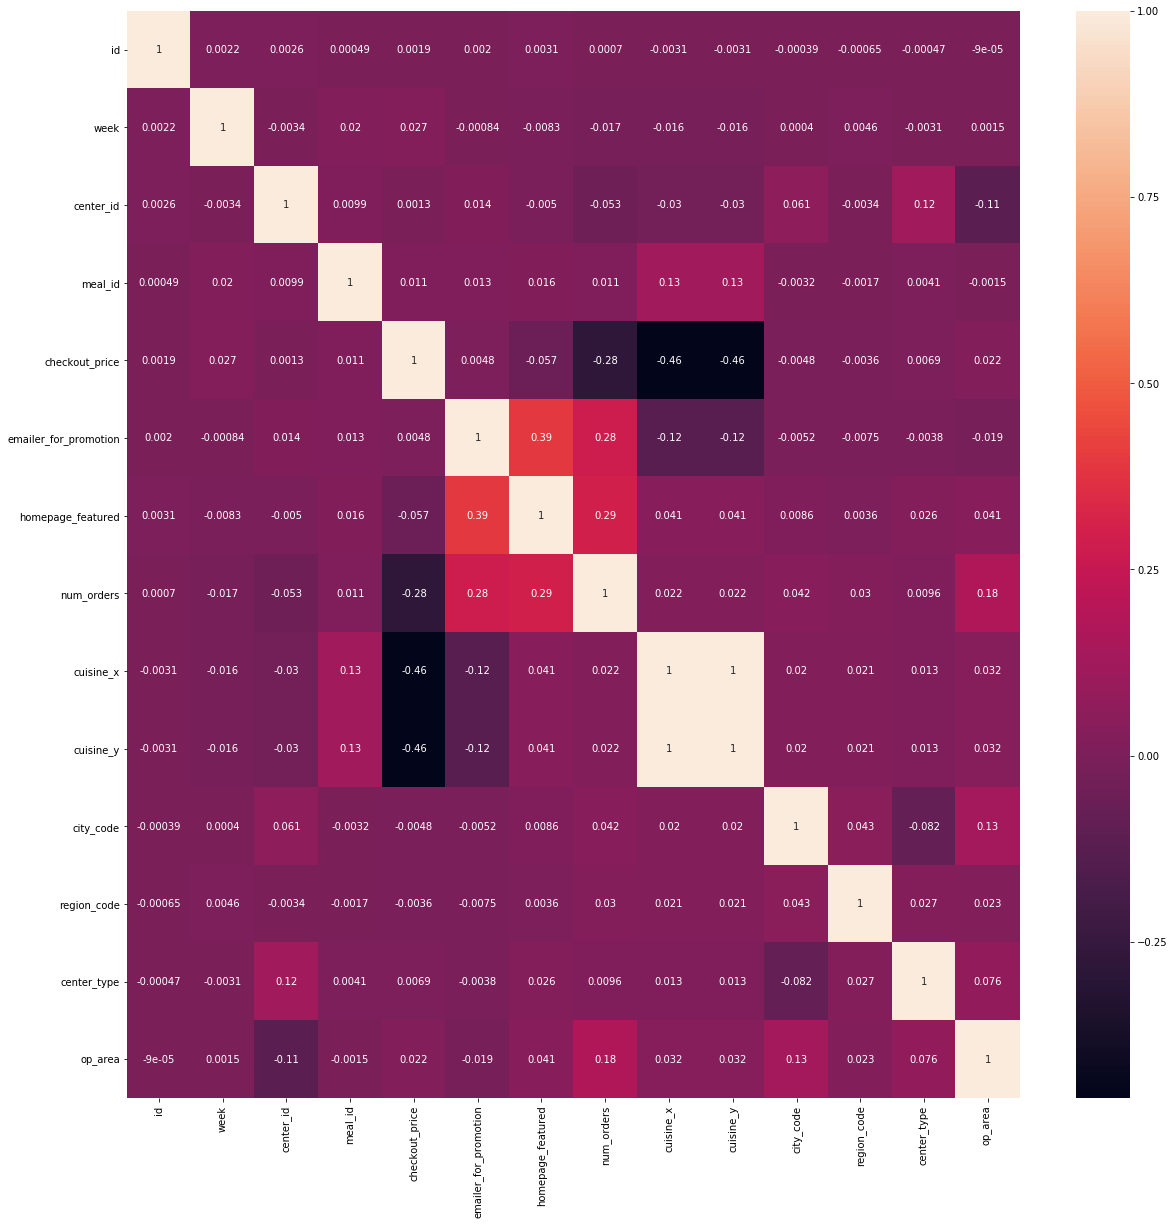

In [28]:
# Get co-relation of features of each features in dataset and plot diagram for heatmap
cormat = train.corr()
top_corr_features = cormat.index
plt.figure(figsize = (20,20))
# Plot Heatmap
sns.heatmap(train[top_corr_features].corr(),annot = True)

In [29]:
X_train = train.drop(['id','num_orders'],axis = 1)
Y_train = train['num_orders']
X_test = test.drop(['id'],axis = 1).copy()

In [30]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#Apply SelectKbest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func = chi2, k = 5)

In [31]:
# Memory Error occur while running that
#fit = bestfeatures.fit(X_train,Y_train)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X_train.columns)
#Concat two DataFrame for better Visualization
#Featurescore = pd.concat([dfscores,dfcolumns], axis = 1)
#Featurescore.columns = ['Specs','Scores'] # Naming the dataframe columns
#print(Featurescore.nlargest(8,'Scores')) # Print 10 best Feature scores

# Feature Selection

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,Y_train)
print(model.feature_importances_) # use inbuilt class feature importances of tree based classifier

[0.11458878 0.03704895 0.21820774 0.28009704 0.03841509 0.08672453
 0.02136948 0.01432287 0.03341977 0.04084446 0.02315187 0.09180941]


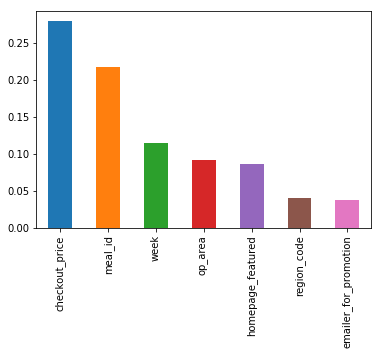

In [33]:
# plot grpah of feature importnaces for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind = 'bar')
plt.show()

# Hyper-parameter tuning using Gridsearchcv and RandomizedSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import time
max_depth = [40,60,85,110]
min_samples_leaf = [5,15,30,60]
param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
D_T = DecisionTreeRegressor()
grid = GridSearchCV(estimator = D_T,param_grid = param_grid, cv = 3)
start_time = time.time()
grid_result = grid.fit(X_train,Y_train)

In [35]:
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best: 0.519229 using {'max_depth': 40, 'min_samples_leaf': 30}


In [36]:
print("Execution Time:"+str((time.time()-start_time))+'ms')

Execution Time:397.9104337692261ms


In [37]:
from sklearn.model_selection import RandomizedSearchCV
import random 
D_grid = {'max_depth': list(range(20,120)),
         'min_samples_leaf':list(range(5,70))}
D_Tr = DecisionTreeRegressor()
D_T_search = RandomizedSearchCV(estimator = D_Tr,param_distributions = D_grid,cv = 3)

In [38]:
start_time = time.time()
D_t_res = D_T_search.fit(X_train,Y_train)

In [39]:
print("Best: %f using %s" %(D_t_res.best_score_,D_t_res.best_params_))

Best: 0.512786 using {'min_samples_leaf': 60, 'max_depth': 104}


In [40]:
deci_tr = DecisionTreeRegressor(min_samples_leaf = 20, max_depth = 26)
deci_tr.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=26, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
deci_prediction = deci_tr.predict(X_test)
dec_score = round(deci_tr.score(X_train,Y_train)*100,2)
dec_score

82.6

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(deci_tr,X_train,Y_train, cv = 5)
print(scores)

[0.59398821 0.47612902 0.44882276 0.63572746 0.58986015]


In [43]:
print(scores.mean())

0.5489055221729081


In [44]:
deci_grd = DecisionTreeRegressor(max_depth = 110,min_samples_leaf = 30)
deci_grd.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=110, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [45]:
dec_grd = deci_grd.predict(X_test)
dgrd_score = round(deci_grd.score(X_train,Y_train)*100,2)
dgrd_score

79.92

In [46]:
grid_scores = cross_val_score(deci_grd,X_train,Y_train, cv = 5)
print(grid_scores)

[0.60288639 0.50829486 0.43082077 0.62639184 0.58839358]


In [47]:
print(grid_scores.mean())

0.5513574863130397


In [51]:
from catboost import CatBoostRegressor
C_grid = {'depth':list(range(2,16))
         }
Cat = CatBoostRegressor(iterations = 30,learning_rate = 0.1,loss_function = 'RMSE')
Cat_search = RandomizedSearchCV(estimator = Cat,param_distributions = C_grid,cv = 5)

In [52]:
start_time = time.time()
Cat_result = Cat_search.fit(X_train,Y_train)

0:	learn: 435.9452664	total: 1.41s	remaining: 41s
1:	learn: 412.9465527	total: 1.8s	remaining: 25.2s
2:	learn: 392.0079030	total: 2.02s	remaining: 18.2s
3:	learn: 374.0656843	total: 2.33s	remaining: 15.1s
4:	learn: 358.7484016	total: 2.54s	remaining: 12.7s
5:	learn: 345.2127802	total: 2.88s	remaining: 11.5s
6:	learn: 333.3597231	total: 3.09s	remaining: 10.1s
7:	learn: 323.2130933	total: 3.35s	remaining: 9.21s
8:	learn: 314.2951738	total: 3.63s	remaining: 8.47s
9:	learn: 307.2807273	total: 3.96s	remaining: 7.93s
10:	learn: 300.5415536	total: 4.17s	remaining: 7.2s
11:	learn: 294.5945960	total: 4.43s	remaining: 6.65s
12:	learn: 289.4751792	total: 4.67s	remaining: 6.11s
13:	learn: 284.7427109	total: 4.91s	remaining: 5.61s
14:	learn: 280.0572934	total: 5.24s	remaining: 5.24s
15:	learn: 277.0880907	total: 5.46s	remaining: 4.77s
16:	learn: 274.2812913	total: 5.71s	remaining: 4.37s
17:	learn: 271.0396904	total: 5.94s	remaining: 3.96s
18:	learn: 268.0733022	total: 6.24s	remaining: 3.62s
19:	lea

7:	learn: 306.2430009	total: 3.39s	remaining: 9.32s
8:	learn: 296.6018716	total: 3.81s	remaining: 8.88s
9:	learn: 288.2129532	total: 4.2s	remaining: 8.39s
10:	learn: 280.1854265	total: 4.59s	remaining: 7.93s
11:	learn: 273.2161158	total: 4.99s	remaining: 7.48s
12:	learn: 267.0988013	total: 5.39s	remaining: 7.05s
13:	learn: 261.6930519	total: 5.78s	remaining: 6.6s
14:	learn: 256.3982822	total: 6.18s	remaining: 6.18s
15:	learn: 252.5455836	total: 6.57s	remaining: 5.75s
16:	learn: 249.3756638	total: 6.97s	remaining: 5.33s
17:	learn: 245.7970452	total: 7.36s	remaining: 4.91s
18:	learn: 241.8367933	total: 7.75s	remaining: 4.49s
19:	learn: 238.0875159	total: 8.15s	remaining: 4.07s
20:	learn: 235.5189914	total: 8.54s	remaining: 3.66s
21:	learn: 232.6993084	total: 8.93s	remaining: 3.25s
22:	learn: 230.3115727	total: 9.33s	remaining: 2.84s
23:	learn: 227.9881748	total: 9.75s	remaining: 2.44s
24:	learn: 226.3935478	total: 10.2s	remaining: 2.03s
25:	learn: 224.2194572	total: 10.5s	remaining: 1.62

14:	learn: 302.1965810	total: 2.73s	remaining: 2.73s
15:	learn: 298.8751980	total: 2.89s	remaining: 2.53s
16:	learn: 295.3473074	total: 3.09s	remaining: 2.36s
17:	learn: 292.9617301	total: 3.26s	remaining: 2.17s
18:	learn: 290.1171746	total: 3.46s	remaining: 2s
19:	learn: 286.8984590	total: 3.63s	remaining: 1.81s
20:	learn: 284.7115914	total: 3.81s	remaining: 1.63s
21:	learn: 282.0191418	total: 3.98s	remaining: 1.45s
22:	learn: 280.2939688	total: 4.17s	remaining: 1.27s
23:	learn: 278.8479402	total: 4.34s	remaining: 1.09s
24:	learn: 277.4412066	total: 4.54s	remaining: 908ms
25:	learn: 275.8651364	total: 4.7s	remaining: 723ms
26:	learn: 274.3823768	total: 4.89s	remaining: 543ms
27:	learn: 273.0454296	total: 5.05s	remaining: 361ms
28:	learn: 272.0918480	total: 5.24s	remaining: 181ms
29:	learn: 269.4012307	total: 5.41s	remaining: 0us
0:	learn: 453.6511028	total: 166ms	remaining: 4.82s
1:	learn: 432.7490085	total: 328ms	remaining: 4.59s
2:	learn: 414.7794872	total: 527ms	remaining: 4.74s
3:

21:	learn: 240.3889060	total: 6.27s	remaining: 2.28s
22:	learn: 238.4458462	total: 6.55s	remaining: 1.99s
23:	learn: 236.3213772	total: 6.81s	remaining: 1.7s
24:	learn: 234.0820746	total: 7.1s	remaining: 1.42s
25:	learn: 232.1523341	total: 7.41s	remaining: 1.14s
26:	learn: 230.4090540	total: 7.73s	remaining: 859ms
27:	learn: 228.8913764	total: 8.01s	remaining: 572ms
28:	learn: 227.2845822	total: 8.29s	remaining: 286ms
29:	learn: 225.6440170	total: 8.58s	remaining: 0us
0:	learn: 447.3116932	total: 260ms	remaining: 7.55s
1:	learn: 421.1918149	total: 535ms	remaining: 7.49s
2:	learn: 397.5185191	total: 816ms	remaining: 7.35s
3:	learn: 377.0788057	total: 1.09s	remaining: 7.1s
4:	learn: 360.2598812	total: 1.38s	remaining: 6.88s
5:	learn: 344.8874135	total: 1.63s	remaining: 6.51s
6:	learn: 331.5952232	total: 1.89s	remaining: 6.22s
7:	learn: 319.4594347	total: 2.17s	remaining: 5.98s
8:	learn: 309.9830070	total: 2.46s	remaining: 5.73s
9:	learn: 301.1257337	total: 2.71s	remaining: 5.43s
10:	lear

28:	learn: 288.8548735	total: 4.77s	remaining: 165ms
29:	learn: 287.8861099	total: 4.91s	remaining: 0us
0:	learn: 455.0177778	total: 148ms	remaining: 4.3s
1:	learn: 435.1372420	total: 294ms	remaining: 4.11s
2:	learn: 418.3074898	total: 473ms	remaining: 4.25s
3:	learn: 403.8198190	total: 622ms	remaining: 4.04s
4:	learn: 391.4055704	total: 789ms	remaining: 3.94s
5:	learn: 381.2133452	total: 937ms	remaining: 3.75s
6:	learn: 371.8659723	total: 1.12s	remaining: 3.67s
7:	learn: 364.0338000	total: 1.27s	remaining: 3.49s
8:	learn: 355.6227942	total: 1.44s	remaining: 3.36s
9:	learn: 349.7814941	total: 1.59s	remaining: 3.17s
10:	learn: 342.6733593	total: 1.77s	remaining: 3.06s
11:	learn: 338.3220665	total: 1.92s	remaining: 2.88s
12:	learn: 334.3051275	total: 2.1s	remaining: 2.75s
13:	learn: 330.0373182	total: 2.25s	remaining: 2.57s
14:	learn: 325.3349427	total: 2.42s	remaining: 2.42s
15:	learn: 321.8986847	total: 2.57s	remaining: 2.25s
16:	learn: 319.4313249	total: 2.75s	remaining: 2.1s
17:	lear

5:	learn: 332.2291386	total: 5.15s	remaining: 20.6s
6:	learn: 317.0379395	total: 6.01s	remaining: 19.8s
7:	learn: 303.5902332	total: 6.87s	remaining: 18.9s
8:	learn: 291.8388478	total: 7.7s	remaining: 18s
9:	learn: 281.4469675	total: 8.53s	remaining: 17.1s
10:	learn: 272.7758061	total: 9.38s	remaining: 16.2s
11:	learn: 264.8121072	total: 10.2s	remaining: 15.3s
12:	learn: 257.1101368	total: 11s	remaining: 14.4s
13:	learn: 250.6628520	total: 11.9s	remaining: 13.6s
14:	learn: 244.1068664	total: 12.7s	remaining: 12.7s
15:	learn: 239.3856273	total: 13.6s	remaining: 11.9s
16:	learn: 234.4186302	total: 14.4s	remaining: 11s
17:	learn: 230.1475884	total: 15.2s	remaining: 10.2s
18:	learn: 226.6499580	total: 16.1s	remaining: 9.3s
19:	learn: 224.0006930	total: 16.9s	remaining: 8.45s
20:	learn: 220.5236195	total: 17.7s	remaining: 7.6s
21:	learn: 217.6108512	total: 18.6s	remaining: 6.76s
22:	learn: 214.8971681	total: 19.5s	remaining: 5.93s
23:	learn: 212.6256120	total: 20.4s	remaining: 5.09s
24:	lea

12:	learn: 288.9168843	total: 3.64s	remaining: 4.76s
13:	learn: 283.9957172	total: 3.94s	remaining: 4.5s
14:	learn: 278.8659323	total: 4.21s	remaining: 4.21s
15:	learn: 274.3097530	total: 4.46s	remaining: 3.9s
16:	learn: 270.5895123	total: 4.72s	remaining: 3.61s
17:	learn: 267.0958654	total: 4.95s	remaining: 3.3s
18:	learn: 264.0786966	total: 5.21s	remaining: 3.02s
19:	learn: 261.3072422	total: 5.43s	remaining: 2.72s
20:	learn: 258.6895690	total: 5.7s	remaining: 2.44s
21:	learn: 256.6560373	total: 5.92s	remaining: 2.15s
22:	learn: 254.1002018	total: 6.22s	remaining: 1.89s
23:	learn: 251.7126572	total: 6.48s	remaining: 1.62s
24:	learn: 249.7265910	total: 6.72s	remaining: 1.34s
25:	learn: 247.6761852	total: 6.98s	remaining: 1.07s
26:	learn: 246.3763614	total: 7.21s	remaining: 801ms
27:	learn: 244.8384570	total: 7.46s	remaining: 533ms
28:	learn: 242.8546842	total: 7.72s	remaining: 266ms
29:	learn: 241.2828687	total: 7.96s	remaining: 0us
0:	learn: 462.4941955	total: 264ms	remaining: 7.66s


20:	learn: 326.0032855	total: 3.27s	remaining: 1.4s
21:	learn: 324.5624408	total: 3.4s	remaining: 1.24s
22:	learn: 323.3384050	total: 3.54s	remaining: 1.08s
23:	learn: 320.0436332	total: 3.68s	remaining: 920ms
24:	learn: 318.3765372	total: 3.92s	remaining: 785ms
25:	learn: 315.8639963	total: 4.06s	remaining: 625ms
26:	learn: 314.6982635	total: 4.22s	remaining: 468ms
27:	learn: 313.7892275	total: 4.35s	remaining: 310ms
28:	learn: 312.9684079	total: 4.49s	remaining: 155ms
29:	learn: 312.2224906	total: 4.63s	remaining: 0us
0:	learn: 470.5858236	total: 219ms	remaining: 6.35s
1:	learn: 451.6392747	total: 470ms	remaining: 6.57s
2:	learn: 435.6256101	total: 762ms	remaining: 6.86s
3:	learn: 421.7621892	total: 977ms	remaining: 6.35s
4:	learn: 409.2957689	total: 1.23s	remaining: 6.14s
5:	learn: 398.8756755	total: 1.45s	remaining: 5.82s
6:	learn: 390.0197724	total: 1.72s	remaining: 5.66s
7:	learn: 382.3958912	total: 1.93s	remaining: 5.31s
8:	learn: 375.7409909	total: 2.24s	remaining: 5.24s
9:	lea

27:	learn: 218.7883802	total: 14.9s	remaining: 1.07s
28:	learn: 216.9950752	total: 15.4s	remaining: 532ms
29:	learn: 215.6562025	total: 15.9s	remaining: 0us
0:	learn: 460.7229470	total: 481ms	remaining: 13.9s
1:	learn: 431.6756291	total: 959ms	remaining: 13.4s
2:	learn: 406.9447513	total: 1.47s	remaining: 13.2s
3:	learn: 384.9242616	total: 2.05s	remaining: 13.3s
4:	learn: 365.1835351	total: 2.53s	remaining: 12.6s
5:	learn: 348.1632887	total: 3.02s	remaining: 12.1s
6:	learn: 334.3052322	total: 3.52s	remaining: 11.6s
7:	learn: 321.3445703	total: 4.25s	remaining: 11.7s
8:	learn: 309.5057065	total: 4.71s	remaining: 11s
9:	learn: 300.2678164	total: 5.19s	remaining: 10.4s
10:	learn: 291.2237177	total: 5.67s	remaining: 9.8s
11:	learn: 283.0165815	total: 6.45s	remaining: 9.67s
12:	learn: 275.7680602	total: 6.92s	remaining: 9.05s
13:	learn: 269.5579408	total: 7.4s	remaining: 8.45s
14:	learn: 264.1636676	total: 7.95s	remaining: 7.95s
15:	learn: 258.7673875	total: 8.48s	remaining: 7.42s
16:	learn

4:	learn: 388.4146579	total: 1.03s	remaining: 5.14s
5:	learn: 374.6803504	total: 1.2s	remaining: 4.82s
6:	learn: 363.4155221	total: 1.43s	remaining: 4.7s
7:	learn: 353.8751270	total: 1.61s	remaining: 4.42s
8:	learn: 344.4171686	total: 1.83s	remaining: 4.28s
9:	learn: 336.7958652	total: 2.02s	remaining: 4.03s
10:	learn: 329.6974001	total: 2.23s	remaining: 3.85s
11:	learn: 324.2110010	total: 2.42s	remaining: 3.63s
12:	learn: 317.7219070	total: 2.65s	remaining: 3.46s
13:	learn: 312.6743386	total: 2.83s	remaining: 3.24s
14:	learn: 308.5332399	total: 3.04s	remaining: 3.04s
15:	learn: 304.6695212	total: 3.25s	remaining: 2.84s
16:	learn: 300.6645956	total: 3.47s	remaining: 2.66s
17:	learn: 297.3354537	total: 3.7s	remaining: 2.47s
18:	learn: 293.8260199	total: 3.96s	remaining: 2.29s
19:	learn: 290.2956893	total: 4.16s	remaining: 2.08s
20:	learn: 288.4627110	total: 4.37s	remaining: 1.87s
21:	learn: 285.9831744	total: 4.64s	remaining: 1.69s
22:	learn: 283.8631617	total: 4.85s	remaining: 1.48s
23

In [53]:
print("Best: %f using %s" %(Cat_result.best_score_,Cat_result.best_params_))

Best: 314.120044 using {'depth': 3}


In [55]:
Catboost = CatBoostRegressor(learning_rate = 0.1, depth = 3,loss_function = 'RMSE', iterations = 20)
Catboost.fit(X_train,Y_train)

0:	learn: 453.4032518	total: 182ms	remaining: 3.45s
1:	learn: 435.1252931	total: 353ms	remaining: 3.18s
2:	learn: 419.7685040	total: 569ms	remaining: 3.23s
3:	learn: 405.9541826	total: 736ms	remaining: 2.94s
4:	learn: 394.5030090	total: 957ms	remaining: 2.87s
5:	learn: 384.3730527	total: 1.13s	remaining: 2.64s
6:	learn: 375.9589364	total: 1.34s	remaining: 2.5s
7:	learn: 368.3879334	total: 1.52s	remaining: 2.28s
8:	learn: 362.0300651	total: 1.75s	remaining: 2.14s
9:	learn: 356.6622982	total: 1.92s	remaining: 1.92s
10:	learn: 352.0438498	total: 2.13s	remaining: 1.75s
11:	learn: 347.8391921	total: 2.3s	remaining: 1.53s
12:	learn: 344.2988207	total: 2.51s	remaining: 1.35s
13:	learn: 341.1447006	total: 2.68s	remaining: 1.15s
14:	learn: 338.3701153	total: 2.9s	remaining: 965ms
15:	learn: 336.0033335	total: 3.06s	remaining: 766ms
16:	learn: 333.4582834	total: 3.27s	remaining: 578ms
17:	learn: 331.1988136	total: 3.44s	remaining: 383ms
18:	learn: 329.3255843	total: 3.66s	remaining: 193ms
19:	le

In [58]:
C_score = round(Catboost.score(X_train,Y_train)/10,2)
C_score

32.76

In [59]:
Cat_scores = cross_val_score(Catboost, X_train,Y_train,cv = 5)
Cat_scores

0:	learn: 441.9969992	total: 150ms	remaining: 2.86s
1:	learn: 424.1256616	total: 290ms	remaining: 2.6s
2:	learn: 409.0307493	total: 474ms	remaining: 2.69s
3:	learn: 396.1228736	total: 616ms	remaining: 2.46s
4:	learn: 384.5327605	total: 813ms	remaining: 2.44s
5:	learn: 375.0779218	total: 949ms	remaining: 2.21s
6:	learn: 366.6865120	total: 1.13s	remaining: 2.09s
7:	learn: 359.4717711	total: 1.26s	remaining: 1.9s
8:	learn: 353.6357967	total: 1.44s	remaining: 1.76s
9:	learn: 348.2753648	total: 1.57s	remaining: 1.57s
10:	learn: 343.6927094	total: 1.74s	remaining: 1.43s
11:	learn: 339.9655570	total: 1.88s	remaining: 1.25s
12:	learn: 336.3950239	total: 2.06s	remaining: 1.11s
13:	learn: 331.1746226	total: 2.2s	remaining: 943ms
14:	learn: 328.5857921	total: 2.38s	remaining: 792ms
15:	learn: 326.0777115	total: 2.63s	remaining: 657ms
16:	learn: 323.8392452	total: 2.83s	remaining: 500ms
17:	learn: 320.5277414	total: 3.03s	remaining: 336ms
18:	learn: 317.9185867	total: 3.21s	remaining: 169ms
19:	le

array([360.57860243, 327.81354724, 263.15051414, 296.72517791,
       395.69765063])

In [60]:
print(Cat_scores.mean())

328.79309847205894


In [53]:
#from sklearn.ensemble import RandomForestRegressor
#R_gid = {'n_estimators': list(range(10,150)),
#'n_jobs': list(range(5,100))
#}
#R_F = RandomForestRegressor()
#RF_search = RandomizedSearchCV(estimator = R_F,param_distributions = R_gid,cv = 3)

In [ ]:
#start_time = time.time()
#RF_result = RF_search.fit(X_train,Y_train)

In [ ]:
#print("Best: %f using %s" %(RF_result.best_score_,RF_result.best_params_))
#print("Execution Time:"+str((time.time()-start_time))+'ms')